# Introduction

## Dataset Description
The dataset that is being worked on is called Flight Delay, and has significant amounts of information on flights from the years 2018-2024. This set of data has 29 columns, with information relating to date of flight, overall flight time, location data, and delay explanations.

The dataset can be found here: https://www.kaggle.com/datasets/arvindnagaonkar/flight-delay/data

## Proposed Question(s)

Is there a correlation between domestic flight delays and weather in the domestic airline market?

# Data Exploration

In [5]:
# Import Packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [6]:
# Read parquet file, make df. Source: https://stackoverflow.com/questions/33813815/how-to-read-a-parquet-file-into-pandas-dataframe
df = pd.read_parquet('Flight_Delay.parquet', engine='pyarrow')

In [7]:
# Check layout of dataset visually.
df.head()

,Year,Month,DayofMonth,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,CRSDepTime,DepTime,DepDelay,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2018,1,15,2018-01-15,UA,"Newark, NJ","Charleston, SC",1845,1928.0,43.0,...,143.0,141.0,102.0,628.0,3,41.0,0.0,0.0,0.0,0.0
2,2018,1,16,2018-01-16,UA,"Newark, NJ","Charleston, SC",1835,1956.0,81.0,...,143.0,131.0,108.0,628.0,3,67.0,0.0,0.0,0.0,2.0
3,2018,1,17,2018-01-17,UA,"Newark, NJ","Charleston, SC",1835,1836.0,1.0,...,143.0,138.0,113.0,628.0,3,0.0,0.0,0.0,0.0,0.0
4,2018,1,18,2018-01-18,UA,"Newark, NJ","Charleston, SC",1845,1844.0,-1.0,...,143.0,134.0,92.0,628.0,3,0.0,0.0,0.0,0.0,0.0
6,2018,1,20,2018-01-20,UA,"Newark, NJ","Charleston, SC",1835,1829.0,-6.0,...,143.0,117.0,89.0,628.0,3,0.0,0.0,0.0,0.0,0.0


In [8]:
# Check for any abnormal information, column types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year                       int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   FlightDate                 object 
 4   Marketing_Airline_Network  object 
 5   OriginCityName             object 
 6   DestCityName               object 
 7   CRSDepTime                 int64  
 8   DepTime                    float64
 9   DepDelay                   float64
 10  DepDelayMinutes            float64
 11  TaxiOut                    float64
 12  WheelsOff                  float64
 13  WheelsOn                   float64
 14  TaxiIn                     float64
 15  CRSArrTime                 int64  
 16  ArrTime                    float64
 17  ArrDelay                   float64
 18  ArrDelayMinutes            float64
 19  CRSElapsedTime             float64
 20  ActualE

In [9]:
# Check for null values in dataset.
df.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
FlightDate                   0
Marketing_Airline_Network    0
OriginCityName               0
DestCityName                 0
CRSDepTime                   0
DepTime                      0
DepDelay                     0
DepDelayMinutes              0
TaxiOut                      0
WheelsOff                    0
WheelsOn                     0
TaxiIn                       0
CRSArrTime                   0
ArrTime                      0
ArrDelay                     0
ArrDelayMinutes              0
CRSElapsedTime               0
ActualElapsedTime            0
AirTime                      0
Distance                     0
DistanceGroup                0
CarrierDelay                 0
WeatherDelay                 0
NASDelay                     0
SecurityDelay                0
LateAircraftDelay            0
dtype: int64

In [10]:
# Check for duplicated values.
df.duplicated().sum()

0

In [11]:
# Check min and max in WeatherDelay column for skewed data.
print(df.WeatherDelay.max())
print(df.WeatherDelay.min())

2900.0
0.0


In [12]:
# Check departure city locations.
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df.OriginCityName.unique()

array(['Newark, NJ', 'Providence, RI', 'Chicago, IL', 'Lafayette, LA',
       'Houston, TX', 'Gulfport/Biloxi, MS', 'Tulsa, OK', 'Greer, SC',
       'Mobile, AL', 'Huntsville, AL', 'Little Rock, AR',
       'Corpus Christi, TX', 'Des Moines, IA', 'Burlington, VT',
       'Atlanta, GA', 'Charleston/Dunbar, WV', 'Lexington, KY',
       'Nashville, TN', 'Minneapolis, MN', 'Richmond, VA',
       'Cleveland, OH', 'Detroit, MI', 'White Plains, NY',
       'Birmingham, AL', 'Jackson/Vicksburg, MS', 'Louisville, KY',
       'Orlando, FL', 'Columbia, SC', 'New York, NY', 'Fayetteville, AR',
       'Newport News/Williamsburg, VA', 'Lincoln, NE', 'Cincinnati, OH',
       'Charleston, SC', 'Tallahassee, FL', 'Pittsburgh, PA',
       'Charlotte, NC', 'Philadelphia, PA', 'Hartford, CT',
       'Savannah, GA', 'Panama City, FL', 'Valparaiso, FL',
       'St. Louis, MO', 'Killeen, TX', 'Key West, FL', 'Milwaukee, WI',
       'Springfield, MO', 'Evansville, IN', 'Knoxville, TN',
       'Bloomington/Nor

In [13]:
# Check destination city names. 
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df.DestCityName.unique()

array(['Charleston, SC', 'Newark, NJ', 'Fayetteville, AR', 'Houston, TX',
       'Monroe, LA', 'Oklahoma City, OK', 'Baton Rouge, LA',
       'Panama City, FL', 'Chicago, IL', 'Des Moines, IA',
       'Springfield, MO', 'Savannah, GA', 'Amarillo, TX', 'Lexington, KY',
       'Indianapolis, IN', 'Charleston/Dunbar, WV', 'Huntsville, AL',
       'Atlanta, GA', 'Detroit, MI', 'Minneapolis, MN', 'New York, NY',
       'Cleveland, OH', 'White Plains, NY', 'Boston, MA', 'Richmond, VA',
       'Jackson/Vicksburg, MS', 'Tulsa, OK', 'Orlando, FL',
       'Birmingham, AL', 'Louisville, KY', 'Greer, SC', 'Key West, FL',
       'Milwaukee, WI', 'Newport News/Williamsburg, VA', 'Augusta, GA',
       'Lincoln, NE', 'Charlotte, NC', 'Nashville, TN',
       'Philadelphia, PA', 'Killeen, TX', 'Evansville, IN',
       'Hartford, CT', 'St. Louis, MO', 'Cincinnati, OH', 'Madison, WI',
       'Greensboro/High Point, NC', 'Knoxville, TN',
       'Gulfport/Biloxi, MS', 'Pittsburgh, PA', 'Columbia, SC',
     

In [14]:
# Check years.
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df.Year.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

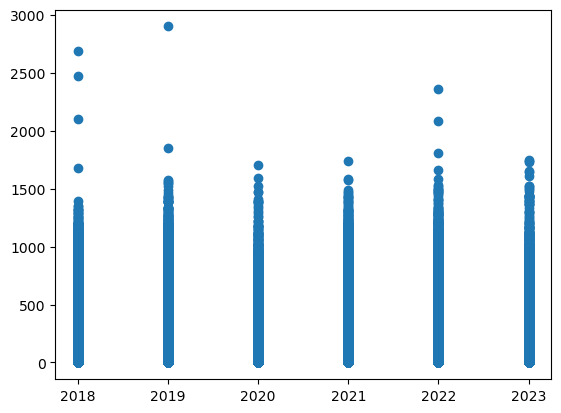

In [15]:
# Initial simple scatter plot visual based on year.
plt.scatter(df.Year, df.WeatherDelay)

# Data Cleaning

Initial dataset is very clean, and only minor adjustments are needed for the analysis.

Based on the above information these steps will be performed:

Columns 'DayofMonth', 'Marketing_Airline_Network', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup' will be removed, as they will not be used in analysis.

Origin City and Departure City will have their States split off into Origin State and Departure State for possilbe use in data analysis.

Floats will be converted to ints. This will be done to simplify the analysis.

New column CleanDates will be created. This column will be used in the regression model, as the Flight Date Column will not be readable by the model.

## Column Removal

Removal of Columns 'DayofMonth', 'Marketing_Airline_Network', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup'.

In [18]:
# Check columns for removal.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year                       int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   FlightDate                 object 
 4   Marketing_Airline_Network  object 
 5   OriginCityName             object 
 6   DestCityName               object 
 7   CRSDepTime                 int64  
 8   DepTime                    float64
 9   DepDelay                   float64
 10  DepDelayMinutes            float64
 11  TaxiOut                    float64
 12  WheelsOff                  float64
 13  WheelsOn                   float64
 14  TaxiIn                     float64
 15  CRSArrTime                 int64  
 16  ArrTime                    float64
 17  ArrDelay                   float64
 18  ArrDelayMinutes            float64
 19  CRSElapsedTime             float64
 20  ActualE

In [19]:
# Drop columns, asign to new dataframe.
df_clean = df.drop(['DayofMonth', 'Marketing_Airline_Network', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
                    'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes',
                    'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup'], axis=1)

In [20]:
# Check for dropped columns.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   FlightDate         object 
 3   OriginCityName     object 
 4   DestCityName       object 
 5   DepDelay           float64
 6   ArrDelay           float64
 7   CarrierDelay       float64
 8   WeatherDelay       float64
 9   NASDelay           float64
 10  SecurityDelay      float64
 11  LateAircraftDelay  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.9+ GB


## Column Splitting

Splitting off of Origin City and Departure City into state and city columns.

In [22]:
# Split OriginCityName, assign to split. Source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
split = df_clean.OriginCityName.str.split(', ', n=1, expand=True)

In [23]:
# Check data.
split.head()

,0,1
1,Newark,NJ
2,Newark,NJ
3,Newark,NJ
4,Newark,NJ
6,Newark,NJ


In [24]:
# Create two new columns with the split data.
# Source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df_clean['OriginCity'] = split[0]
df_clean['OriginState'] = split[1]

In [25]:
# Drop the orignal column.
df_clean.drop(columns='OriginCityName', inplace=True)

In [26]:
# Split DestCityName, assign to split.
# Source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
split = df_clean.DestCityName.str.split(', ', n=1, expand=True)

In [27]:
# Check data.
split.head()

,0,1
1,Charleston,SC
2,Charleston,SC
3,Charleston,SC
4,Charleston,SC
6,Charleston,SC


In [28]:
# Create two new columns with the split data.
# Source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df_clean['DestCity'] = split[0]
df_clean['DestState'] = split[1]

In [29]:
# Drop the orignal column.
df_clean.drop(columns='DestCityName', inplace=True)

In [30]:
# Check that columns were dropped, new columns exist.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   FlightDate         object 
 3   DepDelay           float64
 4   ArrDelay           float64
 5   CarrierDelay       float64
 6   WeatherDelay       float64
 7   NASDelay           float64
 8   SecurityDelay      float64
 9   LateAircraftDelay  float64
 10  OriginCity         object 
 11  OriginState        object 
 12  DestCity           object 
 13  DestState          object 
dtypes: float64(7), int64(2), object(5)
memory usage: 3.4+ GB


In [31]:
# Check origin city names. 
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df_clean.OriginCity.unique()

array(['Newark', 'Providence', 'Chicago', 'Lafayette', 'Houston',
       'Gulfport/Biloxi', 'Tulsa', 'Greer', 'Mobile', 'Huntsville',
       'Little Rock', 'Corpus Christi', 'Des Moines', 'Burlington',
       'Atlanta', 'Charleston/Dunbar', 'Lexington', 'Nashville',
       'Minneapolis', 'Richmond', 'Cleveland', 'Detroit', 'White Plains',
       'Birmingham', 'Jackson/Vicksburg', 'Louisville', 'Orlando',
       'Columbia', 'New York', 'Fayetteville',
       'Newport News/Williamsburg', 'Lincoln', 'Cincinnati', 'Charleston',
       'Tallahassee', 'Pittsburgh', 'Charlotte', 'Philadelphia',
       'Hartford', 'Savannah', 'Panama City', 'Valparaiso', 'St. Louis',
       'Killeen', 'Key West', 'Milwaukee', 'Springfield', 'Evansville',
       'Knoxville', 'Bloomington/Normal', 'Allentown/Bethlehem/Easton',
       'Boston', 'Omaha', 'Greensboro/High Point', 'Memphis', 'Moline',
       'Kalamazoo', 'Bristol/Johnson City/Kingsport', 'Augusta',
       'Gainesville', 'Grand Rapids', 'Buffalo', 'M

In [32]:
# Check origin state names. 
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df_clean.OriginState.unique()

array(['NJ', 'RI', 'IL', 'LA', 'TX', 'MS', 'OK', 'SC', 'AL', 'AR', 'IA',
       'VT', 'GA', 'WV', 'KY', 'TN', 'MN', 'VA', 'OH', 'MI', 'NY', 'FL',
       'NE', 'PA', 'NC', 'CT', 'MO', 'WI', 'IN', 'MA', 'ME', 'DC', 'CO',
       'NV', 'CA', 'UT', 'NM', 'AZ', 'WA', 'OR', 'PR', 'MD', 'NH', 'MT',
       'ID', 'HI', 'AK', 'WY', 'TT', 'KS', 'SD', 'VI', 'ND', 'DE'],
      dtype=object)

In [33]:
# Check destination city names. 
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df_clean.DestCity.unique()

array(['Charleston', 'Newark', 'Fayetteville', 'Houston', 'Monroe',
       'Oklahoma City', 'Baton Rouge', 'Panama City', 'Chicago',
       'Des Moines', 'Springfield', 'Savannah', 'Amarillo', 'Lexington',
       'Indianapolis', 'Charleston/Dunbar', 'Huntsville', 'Atlanta',
       'Detroit', 'Minneapolis', 'New York', 'Cleveland', 'White Plains',
       'Boston', 'Richmond', 'Jackson/Vicksburg', 'Tulsa', 'Orlando',
       'Birmingham', 'Louisville', 'Greer', 'Key West', 'Milwaukee',
       'Newport News/Williamsburg', 'Augusta', 'Lincoln', 'Charlotte',
       'Nashville', 'Philadelphia', 'Killeen', 'Evansville', 'Hartford',
       'St. Louis', 'Cincinnati', 'Madison', 'Greensboro/High Point',
       'Knoxville', 'Gulfport/Biloxi', 'Pittsburgh', 'Columbia',
       'Valparaiso', 'Bloomington/Normal', 'Allentown/Bethlehem/Easton',
       'Kalamazoo', 'Memphis', 'Tallahassee',
       'Bristol/Johnson City/Kingsport', 'Grand Rapids', 'Norfolk',
       'Gainesville', 'Buffalo', 'Myrtle Beach

In [34]:
# Check destination state names. 
# Source: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
df_clean.DestState.unique()

array(['SC', 'NJ', 'AR', 'TX', 'LA', 'OK', 'FL', 'IL', 'IA', 'MO', 'GA',
       'KY', 'IN', 'WV', 'AL', 'MI', 'MN', 'NY', 'OH', 'MA', 'VA', 'MS',
       'WI', 'NE', 'NC', 'TN', 'PA', 'CT', 'ME', 'DC', 'CA', 'AZ', 'PR',
       'NV', 'CO', 'WA', 'UT', 'OR', 'RI', 'NM', 'MD', 'NH', 'VT', 'SD',
       'HI', 'WY', 'AK', 'MT', 'ID', 'TT', 'KS', 'VI', 'ND', 'DE'],
      dtype=object)

## Column Conversion

Conversion of float columns to int columns.

In [36]:
# Check columns to convert.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   FlightDate         object 
 3   DepDelay           float64
 4   ArrDelay           float64
 5   CarrierDelay       float64
 6   WeatherDelay       float64
 7   NASDelay           float64
 8   SecurityDelay      float64
 9   LateAircraftDelay  float64
 10  OriginCity         object 
 11  OriginState        object 
 12  DestCity           object 
 13  DestState          object 
dtypes: float64(7), int64(2), object(5)
memory usage: 3.4+ GB


In [37]:
# Convert float column to int column. 
# Source: https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/
df_clean = df_clean.astype({"DepDelay": 'int64', "ArrDelay": 'int64', "CarrierDelay": 'int64', "WeatherDelay": 'int64', "NASDelay": 'int64',
                            "SecurityDelay": 'int64', "LateAircraftDelay": 'int64'})

In [38]:
# Check that columns were changed.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 14 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               int64 
 1   Month              int64 
 2   FlightDate         object
 3   DepDelay           int64 
 4   ArrDelay           int64 
 5   CarrierDelay       int64 
 6   WeatherDelay       int64 
 7   NASDelay           int64 
 8   SecurityDelay      int64 
 9   LateAircraftDelay  int64 
 10  OriginCity         object
 11  OriginState        object
 12  DestCity           object
 13  DestState          object
dtypes: int64(9), object(5)
memory usage: 3.4+ GB


In [39]:
# Check values in dataset.
df_clean.head()

,Year,Month,FlightDate,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginCity,OriginState,DestCity,DestState
1,2018,1,2018-01-15,43,41,41,0,0,0,0,Newark,NJ,Charleston,SC
2,2018,1,2018-01-16,81,69,67,0,0,0,2,Newark,NJ,Charleston,SC
3,2018,1,2018-01-17,1,-4,0,0,0,0,0,Newark,NJ,Charleston,SC
4,2018,1,2018-01-18,-1,-10,0,0,0,0,0,Newark,NJ,Charleston,SC
6,2018,1,2018-01-20,-6,-32,0,0,0,0,0,Newark,NJ,Charleston,SC


## Create Column CleanDate

The column FlightDate will be converted into a format that is readable by the regression model.

In [41]:
# Convert dates to numbers for regression model.
# Source: https://www.youtube.com/watch?v=bmFVs5XkUbM
clean_dates = mdates.date2num(df_clean.FlightDate)

In [42]:
# Create CleanDates, add to dataframe.
# Source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df_clean['CleanDates'] = clean_dates
# Convert float column to int column. Source: https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/
df_clean = df_clean.astype({"CleanDates": 'int64'})

In [43]:
# Check for column, check that it's type int.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               int64 
 1   Month              int64 
 2   FlightDate         object
 3   DepDelay           int64 
 4   ArrDelay           int64 
 5   CarrierDelay       int64 
 6   WeatherDelay       int64 
 7   NASDelay           int64 
 8   SecurityDelay      int64 
 9   LateAircraftDelay  int64 
 10  OriginCity         object
 11  OriginState        object
 12  DestCity           object
 13  DestState          object
 14  CleanDates         int64 
dtypes: int64(10), object(5)
memory usage: 3.6+ GB


In [44]:
# Visually check column.
df_clean.head()

,Year,Month,FlightDate,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginCity,OriginState,DestCity,DestState,CleanDates
1,2018,1,2018-01-15,43,41,41,0,0,0,0,Newark,NJ,Charleston,SC,17546
2,2018,1,2018-01-16,81,69,67,0,0,0,2,Newark,NJ,Charleston,SC,17547
3,2018,1,2018-01-17,1,-4,0,0,0,0,0,Newark,NJ,Charleston,SC,17548
4,2018,1,2018-01-18,-1,-10,0,0,0,0,0,Newark,NJ,Charleston,SC,17549
6,2018,1,2018-01-20,-6,-32,0,0,0,0,0,Newark,NJ,Charleston,SC,17551


In [45]:
# Save cleaned df to csv. Source: https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
df_clean.to_csv('flight_delay_clean.csv')

# Data Analysis

## Question: Is there a correlation between domestic flight delays and weather in the domestic airline market?

We will be using the pearson r regression model. The column FlightDate will be variable x. WeatherDelay will be variable y.

In [47]:
# Assign columns to X and y.
X = df_clean.CleanDates
y = df_clean.WeatherDelay

In [48]:
# Source: https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation
# Source: https://www.youtube.com/watch?v=bmFVs5XkUbM
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
stats.pearsonr(X, y)

PearsonRResult(statistic=0.0032505422249410245, pvalue=3.2572955812642673e-71)

In [49]:
# Create dataframe with only weather delays.
# Source: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
df_weather_delays = df_clean[df_clean['WeatherDelay'] > 0]

In [50]:
stats.pearsonr(df_weather_delays.CleanDates, df_weather_delays.WeatherDelay)

PearsonRResult(statistic=0.04109091354365808, pvalue=7.378745366859716e-144)

Based on the above results, the null hypothesis can be rejected, but the statistic results in minimal to no correlation. Overall trend compared to all flights is very small. When just looking at flights delayed by weather, evidence is higher, but still small.

# Data Visuals

While the statistical test shows minimal corelation, we can still visually represent the results for the final report.

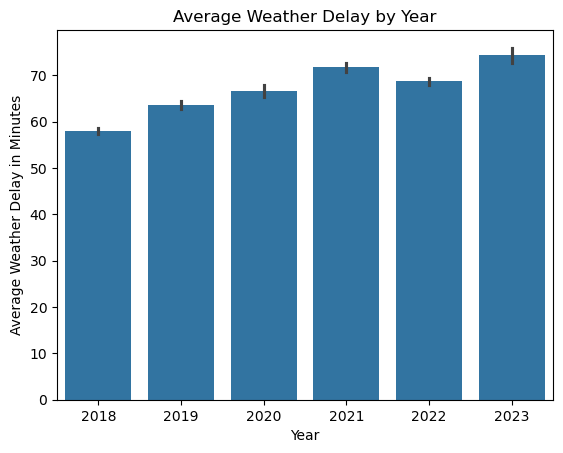

In [118]:
# Create Barplot with Year on X axis and WeatherDelay on y axis.
# Source: https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://www.datacamp.com/tutorial/seaborn-barplot
sns.barplot(data=df_weather_delays , x="Year", y="WeatherDelay")
plt.title('Average Weather Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Weather Delay in Minutes')
plt.show()

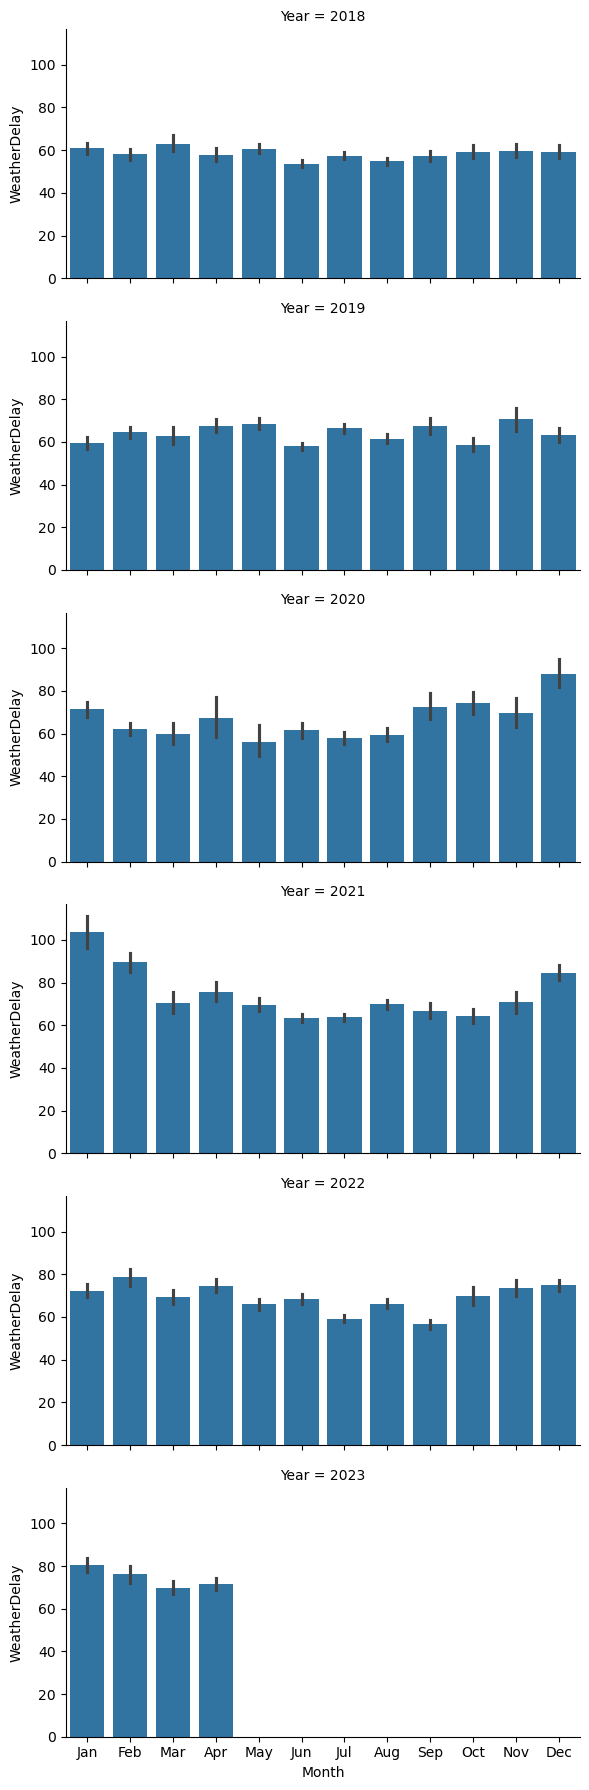

In [54]:
# Create Barplot with Month on X axis and WeatherDelay on y axis. Wrapped by year.
# Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://www.youtube.com/watch?v=MgtDfRuQzrg
# https://www.statology.org/seaborn-ticks/
g = sns.FacetGrid(df_weather_delays, col='Year', col_wrap=1, aspect=2)
g.map(sns.barplot, 'Month', 'WeatherDelay', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

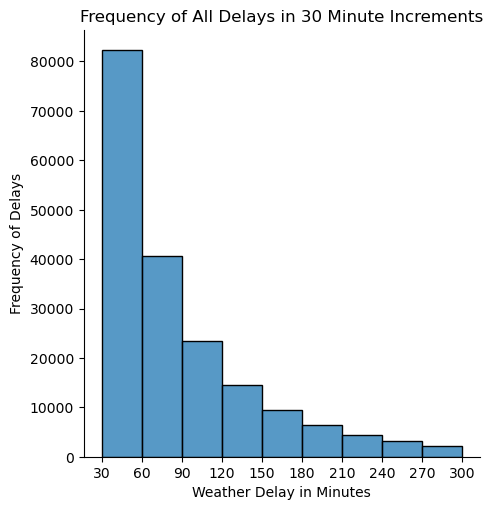

In [108]:
# Create Histogram of WeatherDelay frequency with bins in increments of 30 minutes.
# Source: https://www.statology.org/seaborn-ticks/
# https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=df_weather_delays, x="WeatherDelay",
            bins=[30, 60, 90, 120, 150, 180, 210, 240, 270, 300])
plt.xticks([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])
plt.title('Frequency of All Delays in 30 Minute Increments')
plt.xlabel('Weather Delay in Minutes')
plt.ylabel('Frequency of Delays')
plt.show()

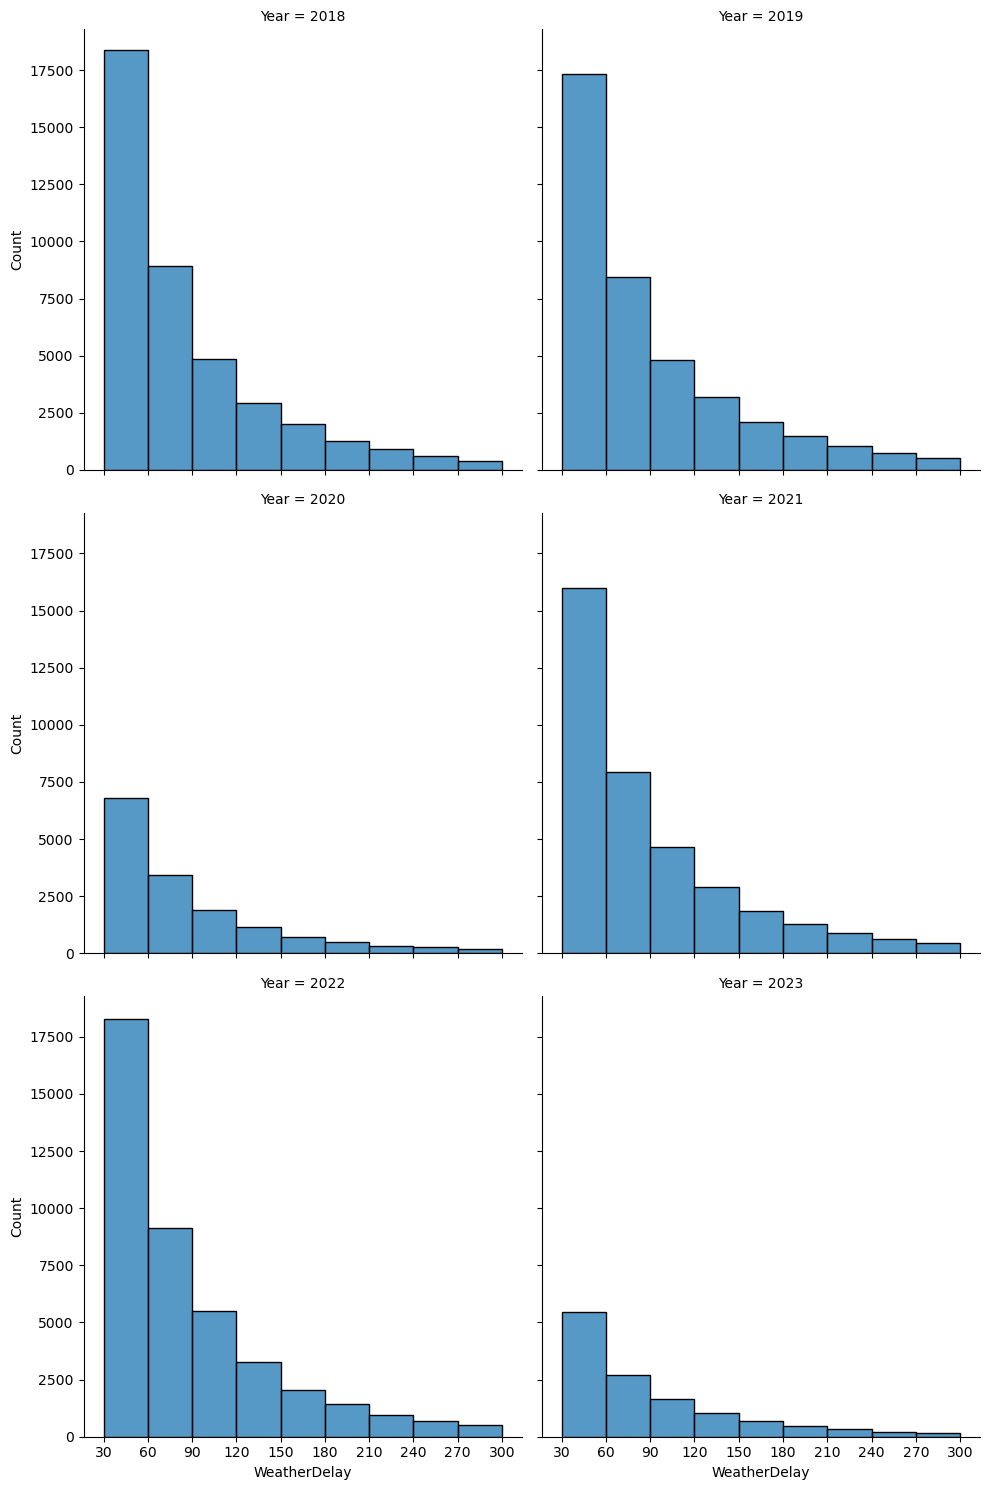

In [116]:
# Create Histogram of WeatherDelay frequency with bins in increments of 30 minutes. Wrapped by year.
# Source: https://seaborn.pydata.org/generated/seaborn.displot.html
# https://seaborn.pydata.org/examples/faceted_histogram.html
# https://www.youtube.com/watch?v=MgtDfRuQzrg
# https://www.youtube.com/watch?v=Bjz00ygERxY
sns.displot(data=df_weather_delays, x="WeatherDelay",
            col="Year", col_wrap=2, bins=[30, 60, 90, 120, 150, 180, 210, 240, 270, 300])
plt.xticks([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])
plt.show()